In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [21]:
df = sns.load_dataset('titanic')

In [22]:
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
349,0,3,male,42.0,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True
721,0,3,male,17.0,1,0,7.0542,S,Third,man,True,NaN,Southampton,no,False
696,0,3,male,44.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
515,0,1,male,47.0,0,0,34.0208,S,First,man,True,D,Southampton,no,True
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
749,0,3,male,31.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
247,1,2,female,24.0,0,2,14.5000,S,Second,woman,False,NaN,Southampton,yes,False
53,1,2,female,29.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
674,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


In [10]:
df.isnull().mean()*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


In [11]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
sam=df.drop(columns=['deck',  'embark_town','embarked','sex','class', 'who', 'adult_male', 'deck',
       'alive', 'alone'])

In [13]:
sam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [14]:
sam.sample()

,survived,pclass,age,sibsp,parch,fare
83,0,1,28.0,0,0,47.1


In [15]:
sam.isnull().mean()*100

,0
survived,0.00000
pclass,0.00000
age,19.86532
sibsp,0.00000
parch,0.00000
fare,0.00000


In [37]:
sam.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [16]:
fea=sam.drop(columns=['fare'])
tar=sam['fare']


In [18]:
xtr,xte,ytr,yte=train_test_split(fea,tar,test_size=0.2)


<ipython-input-20-4add9c809bab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[x])


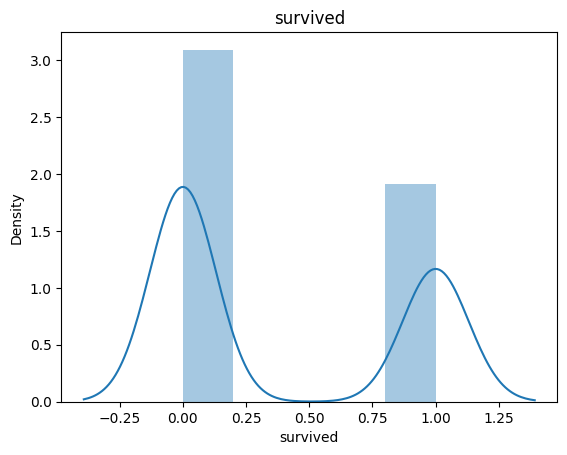

<ipython-input-20-4add9c809bab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[x])


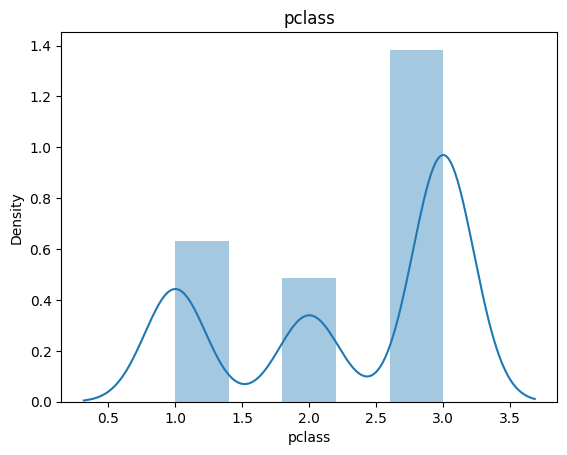

<ipython-input-20-4add9c809bab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[x])


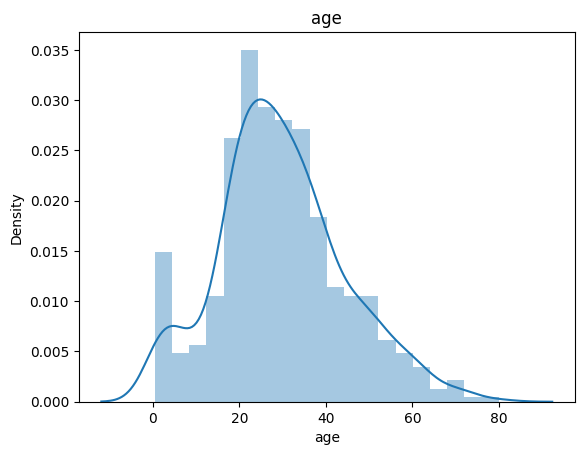

<ipython-input-20-4add9c809bab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[x])


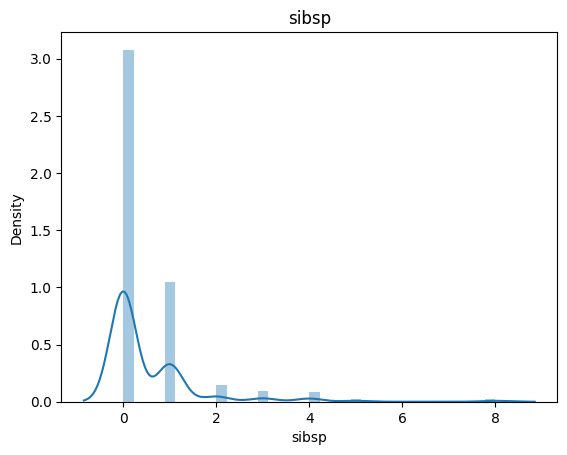

<ipython-input-20-4add9c809bab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[x])


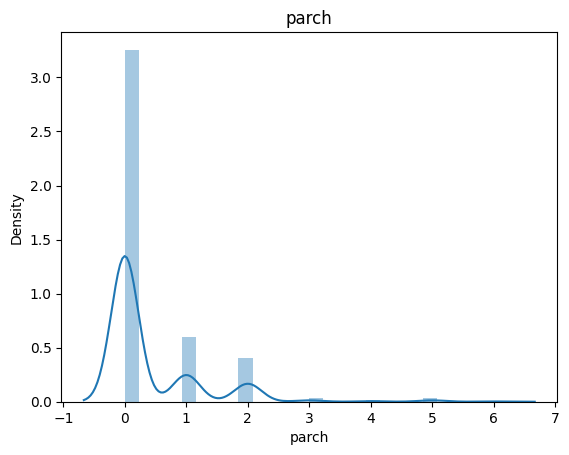

In [20]:
for x in xtr.columns:
    sns.distplot(xtr[x])
    plt.title(x)
    plt.show()

In [27]:
distance_matrix = euclidean_distances(xtr.fillna(0))
print("\nEuclidean Distance Matrix:")
print(distance_matrix)

pd.DataFrame(distance_matrix)


Euclidean Distance Matrix:
[[ 0.          6.164414   28.0713377  ...  6.08276253  6.4807407
  23.10844002]
 [ 6.164414    0.         22.04540769 ... 12.04159458 12.24744871
  17.1464282 ]
 [28.0713377  22.04540769  0.         ... 34.04408906 34.02939905
   5.29150262]
 ...
 [ 6.08276253 12.04159458 34.04408906 ...  0.          2.23606798
  29.06888371]
 [ 6.4807407  12.24744871 34.02939905 ...  2.23606798  0.
  29.01723626]
 [23.10844002 17.1464282   5.29150262 ... 29.06888371 29.01723626
   0.        ]]


,0,1,2,3,4,5,6,7,8,9,...,702,703,704,705,706,707,708,709,710,711
0,0.000000,6.164414,28.071338,6.164414,24.041631,15.297059,26.057628,4.000000,30.083218,10.099505,...,28.089144,48.041649,33.045423,6.480741,39.025633,22.045408,57.008771,6.082763,6.480741,23.108440
1,6.164414,0.000000,22.045408,12.083046,18.055470,9.486833,20.024984,10.099505,24.103942,4.242641,...,22.113344,42.023803,27.055499,12.083046,33.030289,16.062378,51.009803,12.041595,12.247449,17.146428
2,28.071338,22.045408,0.000000,34.029399,4.242641,13.266499,2.236068,32.062439,2.645751,18.055470,...,1.732051,20.000000,5.099020,34.029399,11.090537,6.164414,29.051678,34.044089,34.029399,5.291503
3,6.164414,12.083046,34.029399,0.000000,30.000000,21.307276,32.015621,2.449490,36.069378,16.000000,...,34.073450,54.018515,39.012818,2.000000,45.000000,28.000000,63.007936,1.000000,2.000000,29.086079
4,24.041631,18.055470,4.242641,30.000000,0.000000,9.695360,2.236068,28.035692,6.403124,14.000000,...,4.582576,24.041631,9.055385,30.066593,15.000000,2.000000,33.015148,30.016662,30.066593,2.449490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,22.045408,16.062378,6.164414,28.000000,2.000000,7.874008,4.123106,26.038433,8.306624,12.000000,...,6.403124,26.038433,11.045361,28.071338,17.000000,0.000000,35.014283,28.017851,28.071338,2.449490
708,57.008771,51.009803,29.051678,63.007936,33.015148,42.142615,31.032241,61.008196,27.073973,47.010637,...,29.068884,9.165151,24.041631,63.039670,18.027756,35.014283,0.000000,63.000000,63.039670,34.058773
709,6.082763,12.041595,34.044089,1.000000,30.016662,21.283797,32.031235,2.236068,36.055513,16.031220,...,34.058773,54.027771,39.025633,2.236068,45.011110,28.017851,63.000000,0.000000,2.236068,29.068884
710,6.480741,12.247449,34.029399,2.000000,30.066593,21.213203,32.078030,3.162278,36.013886,16.124515,...,34.014703,54.018515,39.012818,2.828427,45.044423,28.071338,63.039670,2.236068,0.000000,29.017236


In [32]:
# filling na with knn imputeer
imput=KNNImputer(n_neighbors=3)
ct=ColumnTransformer(
    transformers=[('t1',imput,xtr.columns)],
    remainder='passthrough'
)

In [33]:
xtr_transformed=ct.fit_transform(xtr)
xte_trans=ct.transform(xte)

In [39]:
z=pd.DataFrame(xtr_transformed)

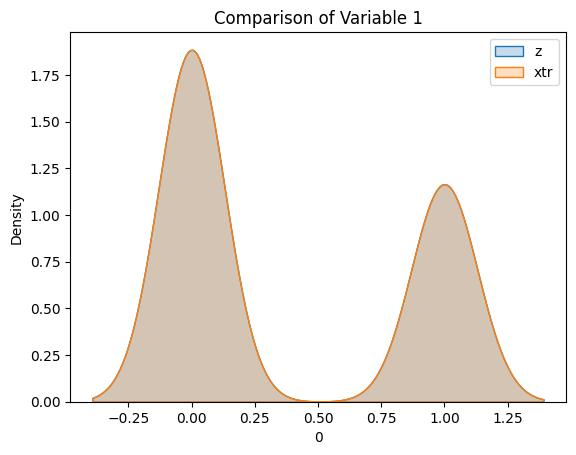

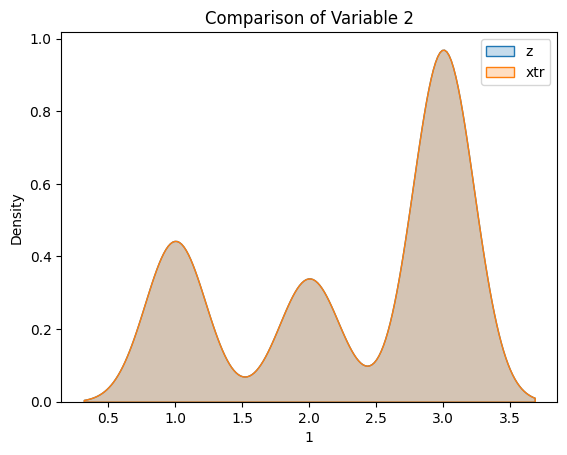

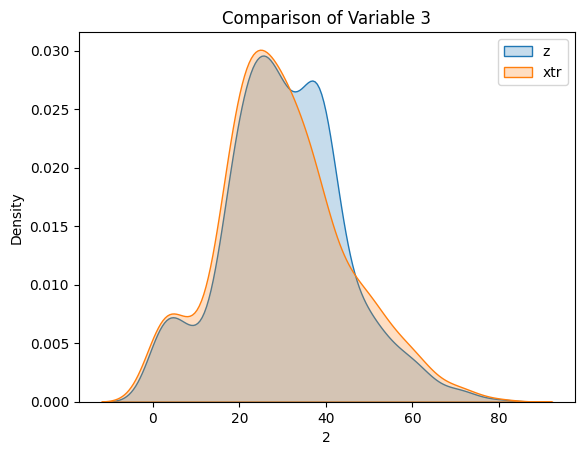

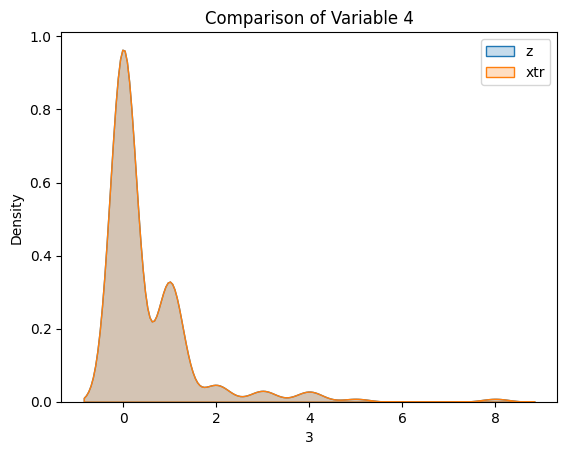

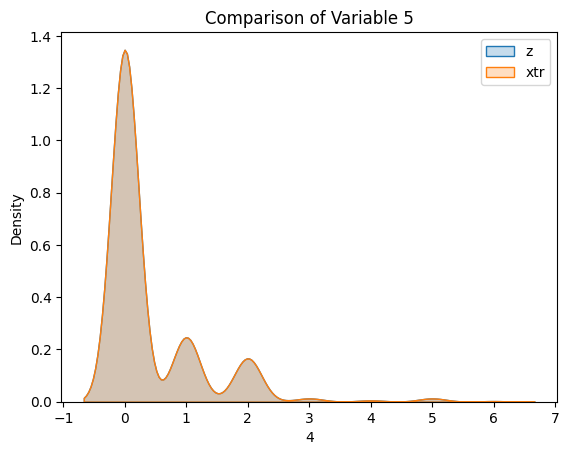

In [59]:
for i in range(5):
    plt.figure()
    sns.kdeplot(z.iloc[:, i], label='z', fill=True)
    sns.kdeplot(xtr.iloc[:, i], label='xtr', fill=True)

    plt.title(f'Comparison of Variable {i+1}')
    plt.legend()
    plt.show()

In [68]:
model=LinearRegression()
model.fit(xtr_transformed,ytr)

prediction=model.predict(xte_trans)
accuracy =r2_score( yte,prediction)

print(accuracy)

0.4923925624335027


In [83]:
#now using standardscaler to settle dowm the things
num_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler()),
])
ss=StandardScaler()
ct1=ColumnTransformer(
    transformers=[('t3',num_pipeline,xtr.columns)],
    remainder='passthrough'
)

In [84]:
xtraa=ct1.fit_transform(xtr)
xteaa=ct1.transform(xte)

In [85]:
p=pd.DataFrame(xtraa)
p

,0,1,2,3,4
0,1.271868,0.826686,-1.762048,-0.486603,0.727050
1,1.271868,0.826686,-1.328130,0.465214,-0.482435
2,-0.786245,-0.355243,0.262904,0.465214,-0.482435
3,-0.786245,0.826686,0.612450,-0.486603,-0.482435
4,-0.786245,0.826686,-0.026375,-0.486603,-0.482435
...,...,...,...,...,...
707,-0.786245,0.826686,-0.171014,-0.486603,-0.482435
708,1.271868,0.826686,2.360176,-0.486603,-0.482435
709,1.271868,0.826686,-0.484400,-0.486603,-0.482435
710,-0.786245,-1.537171,0.913782,-0.486603,-0.482435


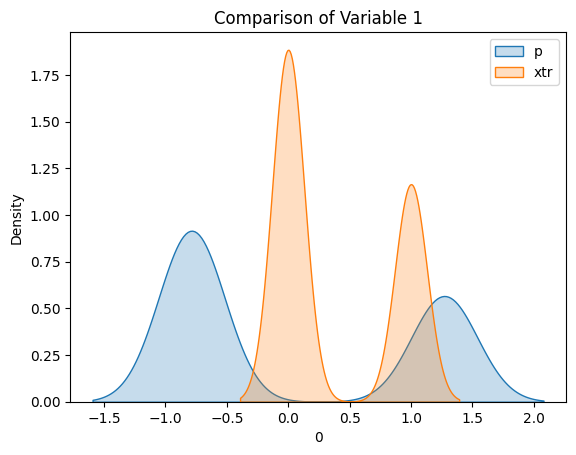

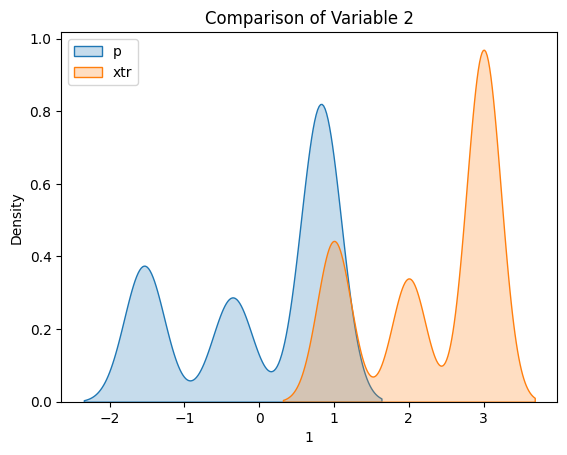

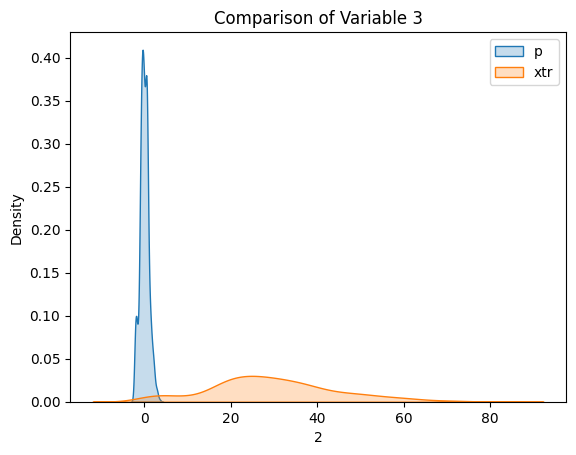

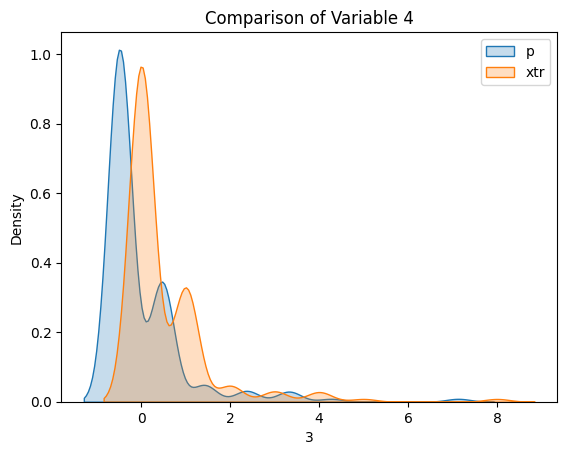

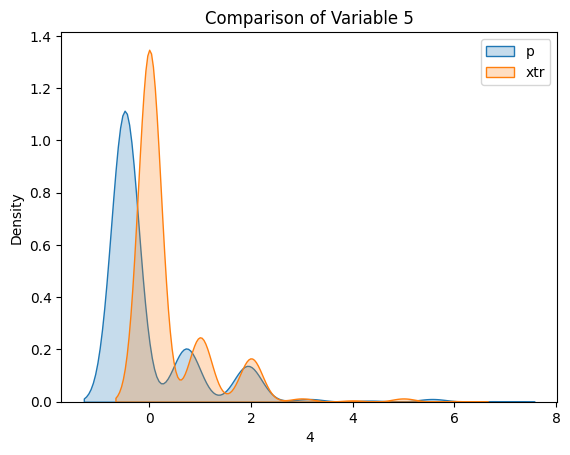

In [86]:
for i in range(5):
    plt.figure()
    sns.kdeplot(p.iloc[:, i], label='p', fill=True)
    sns.kdeplot(xtr.iloc[:, i], label='xtr', fill=True)

    plt.title(f'Comparison of Variable {i+1}')
    plt.legend()
    plt.show()

In [ ]:
# we can seee it has reduced so much of density

In [87]:
model=LinearRegression()
model.fit(xtraa,ytr)

prediction=model.predict(xteaa)
accuracy =r2_score( yte,prediction)

print(accuracy)

0.49239256243350227
